# Loading libraries and changing settings

In [1]:
# Native libraries
from os.path import join
from os import listdir
import itertools
import random
import joblib
import time
import multiprocessing as mp

# Data and ML libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import NullFormatter, PercentFormatter

# Useful library found in the repository
import BespokenTools as bt
# Activate reload of libraries if changes made in previous library
%load_ext autoreload
%autoreload 2

# Filtering annying warnings
import warnings
warnings.filterwarnings(action='ignore')

## Changing visualisation options of pandas.
list_options = [['display.max_columns', None],
                ['display.width', None],
                ['display.max_colwidth', None],
                ['display.precision', 3],
                ['display.min_rows', None],
               ]
for param, value in list_options:
    pd.set_option(param, value)

C:\Users\v95983rc\AppData\Local\anaconda3\envs\mlVAR_DR+Clustering\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\v95983rc\AppData\Local\anaconda3\envs\mlVAR_DR+Clustering\Lib\site-packages\trimap\__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Failed to read module file 'C:\Users\v95983rc\AppData\Local\anaconda3\envs\mlVAR_DR+Clustering\Lib\functools.py' for module 'functools': UnicodeDecodeError
Traceback (most recent call last):
  File "C:\Users\v95983rc\AppData\Local\anaconda3\envs\mlVAR_DR+Clustering\Lib\site-packages\IPython\core\extensions.py", line 62, in load_extensio

# Useful objects

## Dimmed CMap

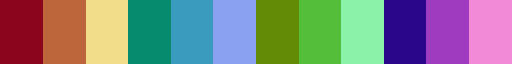

In [2]:
SegGrad = bt.SegGradCMap(n_colors=4, steps=3)
SegGrad

## Args dicts

In [3]:
box_args = dict(rot=90,
                grid=True,
                showmeans=True,
                patch_artist=True,
                return_type='both',
                boxprops=dict(facecolor=[0]*4,
                              color=[0.0,0.5,0.8],
                              linewidth=2.5,
                             ),
                medianprops=dict(color='k',
                                 linewidth=2.5,
                                ),
                meanprops=dict(markerfacecolor='darkviolet',
                               markeredgecolor=[0.0]*4,
                               marker='D',
                              ),
                flierprops=dict(marker='.',
                                markerfacecolor='k',
                                markersize=5,
                                markeredgecolor='none',
                                alpha=0.1,
                               ),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5),
               )

In [4]:
n_neighbors = 2
n_components = 2
seed = 13
embeddings_params = {'PaCMAP':dict(n_components=n_components,
                                   n_neighbors=n_neighbors,
                                   MN_ratio=1.5,
                                   FP_ratio=5.0,
                                   random_state=seed,
                                  ),
                     'LocalMAP':dict(n_components=n_components,
                                     n_neighbors=n_neighbors,
                                     random_state=seed,
                                    ),
                     'tSNE':dict(n_components=n_components,
                                 perplexity=n_neighbors*1,
                                 random_state=seed,
                                ),
                     'UMAP':dict(n_components=n_components,
                                 n_neighbors=n_neighbors,
                                 random_state=seed,
                                ),
                     'TriMAP':dict(n_dims=n_components,
                                   n_inliers=n_neighbors*15,
                                   n_random=0,
                                  ),
                    }
clu_minp = 2
clusterings_params = {'HDBSCAN': dict(min_cluster_size=clu_minp,
                                      cluster_selection_epsilon=0.15,
                                     ),
                      'CLASSIX': dict(verbose=0,
                                      minPts=clu_minp,
                                     ),
                      'MeanShift': dict(bandwidth=0.2),
                     }

# Main Analysis

## Loading data from CSVs to DataFrames

In [5]:
in_folder = r'.'
in_file = 'mlvar_participantsstatistics.csv'

network_features = pd.read_csv(join(in_folder, in_file))
network_features.rename(columns={'Unnamed: 0':'participant_id'},
                        inplace=True,
                       )
print(network_features.shape)
display(network_features.head())

(54, 218)


,participant_id,mu_hopelessness,mu_depression,mu_voices,mu_visions,mu_anxiety,mu_paranoia,mu_delusions,beta_hopelessness_hopelessness,beta_depression_hopelessness,beta_voices_hopelessness,beta_visions_hopelessness,beta_anxiety_hopelessness,beta_paranoia_hopelessness,beta_delusions_hopelessness,beta_hopelessness_depression,beta_depression_depression,beta_voices_depression,beta_visions_depression,beta_anxiety_depression,beta_paranoia_depression,beta_delusions_depression,beta_hopelessness_voices,beta_depression_voices,beta_voices_voices,beta_visions_voices,beta_anxiety_voices,beta_paranoia_voices,beta_delusions_voices,beta_hopelessness_visions,beta_depression_visions,beta_voices_visions,beta_visions_visions,beta_anxiety_visions,beta_paranoia_visions,beta_delusions_visions,beta_hopelessness_anxiety,beta_depression_anxiety,beta_voices_anxiety,beta_visions_anxiety,beta_anxiety_anxiety,beta_paranoia_anxiety,beta_delusions_anxiety,beta_hopelessness_paranoia,beta_depression_paranoia,beta_voices_paranoia,beta_visions_paranoia,beta_anxiety_paranoia,beta_paranoia_paranoia,beta_delusions_paranoia,beta_hopelessness_delusions,beta_depression_delusions,beta_voices_delusions,beta_visions_delusions,beta_anxiety_delusions,beta_paranoia_delusions,beta_delusions_delusions,gamma_theta_hopelessness_hopelessness,gamma_theta_depression_hopelessness,gamma_theta_voices_hopelessness,gamma_theta_visions_hopelessness,gamma_theta_anxiety_hopelessness,gamma_theta_paranoia_hopelessness,gamma_theta_delusions_hopelessness,gamma_theta_hopelessness_depression,gamma_theta_depression_depression,gamma_theta_voices_depression,gamma_theta_visions_depression,gamma_theta_anxiety_depression,gamma_theta_paranoia_depression,gamma_theta_delusions_depression,gamma_theta_hopelessness_voices,gamma_theta_depression_voices,gamma_theta_voices_voices,gamma_theta_visions_voices,gamma_theta_anxiety_voices,gamma_theta_paranoia_voices,gamma_theta_delusions_voices,gamma_theta_hopelessness_visions,gamma_theta_depression_visions,gamma_theta_voices_visions,gamma_theta_visions_visions,gamma_theta_anxiety_visions,gamma_theta_paranoia_visions,gamma_theta_delusions_visions,gamma_theta_hopelessness_anxiety,gamma_theta_depression_anxiety,gamma_theta_voices_anxiety,gamma_theta_visions_anxiety,gamma_theta_anxiety_anxiety,gamma_theta_paranoia_anxiety,gamma_theta_delusions_anxiety,gamma_theta_hopelessness_paranoia,gamma_theta_depression_paranoia,gamma_theta_voices_paranoia,gamma_theta_visions_paranoia,gamma_theta_anxiety_paranoia,gamma_theta_paranoia_paranoia,gamma_theta_delusions_paranoia,gamma_theta_hopelessness_delusions,gamma_theta_depression_delusions,gamma_theta_voices_delusions,gamma_theta_visions_delusions,gamma_theta_anxiety_delusions,gamma_theta_paranoia_delusions,gamma_theta_delusions_delusions,theta_cov_V1_V1,theta_cov_V1_V2,theta_cov_V1_V3,theta_cov_V1_V4,theta_cov_V1_V5,theta_cov_V1_V6,theta_cov_V1_V7,theta_cov_V2_V2,theta_cov_V2_V3,theta_cov_V2_V4,theta_cov_V2_V5,theta_cov_V2_V6,theta_cov_V2_V7,theta_cov_V3_V3,theta_cov_V3_V4,theta_cov_V3_V5,theta_cov_V3_V6,theta_cov_V3_V7,theta_cov_V4_V4,theta_cov_V4_V5,theta_cov_V4_V6,theta_cov_V4_V7,theta_cov_V5_V5,theta_cov_V5_V6,theta_cov_V5_V7,theta_cov_V6_V6,theta_cov_V6_V7,theta_cov_V7_V7,theta_cor_V1_V1,theta_cor_V1_V2,theta_cor_V1_V3,theta_cor_V1_V4,theta_cor_V1_V5,theta_cor_V1_V6,theta_cor_V1_V7,theta_cor_V2_V2,theta_cor_V2_V3,theta_cor_V2_V4,theta_cor_V2_V5,theta_cor_V2_V6,theta_cor_V2_V7,theta_cor_V3_V3,theta_cor_V3_V4,theta_cor_V3_V5,theta_cor_V3_V6,theta_cor_V3_V7,theta_cor_V4_V4,theta_cor_V4_V5,theta_cor_V4_V6,theta_cor_V4_V7,theta_cor_V5_V5,theta_cor_V5_V6,theta_cor_V5_V7,theta_cor_V6_V6,theta_cor_V6_V7,theta_cor_V7_V7,theta_prec_hopelessness_hopelessness,theta_prec_hopelessness_depression,theta_prec_hopelessness_voices,theta_prec_hopelessness_visions,theta_prec_hopelessness_anxiety,theta_prec_hopelessness_paranoia,theta_prec_hopelessness_delusions,theta_prec_depression_depression,theta_prec_depression_voices,theta_prec_depression_vi

## Embedding + Clustering iterations

In [6]:
t0 = time.time()
cpus = mp.cpu_count()-2 # 16-2
combinations = list(itertools.product(embeddings_params.items(),
                                      clusterings_params.items(),
                                     )
                   )
X = network_features.iloc[:, 1:].fillna(0)
X = MinMaxScaler().fit_transform(X)
df = network_features.iloc[:,:1]

results = joblib.Parallel(n_jobs=cpus,
                   timeout=60*3,
                   verbose=1,
                  )(
    joblib.delayed(bt.EmbeddingClustering_Iter)(X,
                                      embedding_key,
                                      clustering_key,
                                      df,
                                             seed=0,
                                     )
    for embedding_key, clustering_key in combinations
)

embeddings_clusterings = {}
for embedding_key, clustering_key, df in results:
    (embeddings_clusterings
     [f'{embedding_key}+{clustering_key}']
    ) = df

t1 = time.time()
print(f'Task finished in {t1-t0} s')

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 out of  15 | elapsed:  1.1min remaining:  3.1min


Task finished in 117.20399761199951 s


[Parallel(n_jobs=14)]: Done  15 out of  15 | elapsed:  2.0min finished


## AMI Pairwise cross evaluation between iterations of combinations

In [7]:
t0 = time.time()
cpus = mp.cpu_count()-2

results = joblib.Parallel(n_jobs=cpus,
                   timeout=60*3,
                   verbose=1,
                  )(
    joblib.delayed(bt.EmbClu_AMI)(EmbClu, df)
    for EmbClu, df in embeddings_clusterings.items()
)

ClusteringMetrics = pd.DataFrame(columns=['AMI_mean',
                                          'AMI_std',
                                         ]
                                )
CluMet_dict = {}

for EmbClu, AMIs in results:
    CluMet_dict[EmbClu]=[AMIs]
    ClusteringMetrics.loc[EmbClu,:]=[np.mean(AMIs),
                                     np.std(AMIs),
                                    ]

t1 = time.time()
print(f'Task finished in {t1-t0} s')

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 out of  15 | elapsed:   52.1s remaining:  2.4min


Task finished in 78.06233859062195 s


[Parallel(n_jobs=14)]: Done  15 out of  15 | elapsed:  1.3min finished


## AMI Pairwise cross evaluation between iterations of n_clusters grouping

In [8]:
CluMet_dict

{'PaCMAP+HDBSCAN': [[0.7507472530210605,
   0.8200308790528991,
   0.8213261209354472,
   0.8465409741036789,
   0.7999306598645497,
   0.7591405842949395,
   0.7926586873318363,
   0.7589430070462354,
   0.7658477993447687,
   0.8483560970566801,
   0.9019698692249063,
   0.8089929227469386,
   1.0,
   0.7689864694999083,
   0.8222589745726411,
   0.8009597432715801,
   0.7634409766816262,
   0.8520017709085247,
   0.8009597432715801,
   0.8451018676007553,
   0.7530245632690102,
   0.8991492835522203,
   0.7379554554256634,
   0.8520017709085247,
   0.849805147697453,
   0.9482913226128928,
   0.8225403846557809,
   0.820660561906282,
   0.8520017709085247,
   0.7434111451367073,
   0.849805147697453,
   0.7006443290325162,
   0.7071536098894688,
   0.8362824791840332,
   0.8987464870268583,
   0.7953246776382672,
   0.8159019229468768,
   0.8513010167761336,
   0.8026655558571932,
   0.6663253553596379,
   0.9482913226128928,
   0.7644267053181653,
   0.9019698692249066,
   0.808992

In [9]:
t0 = time.time()
cpus = mp.cpu_count()-2

df_AMIBoxPlot = pd.DataFrame(dict([(k,
                                    pd.Series(v[0],
                                             )
                                   )
                                   for k,v
                                   in CluMet_dict.items()
                                  ]
                                 )
                            )
combinations = (df_AMIBoxPlot
                .mean()
                .sort_values(ascending=False)
                .index
               )

df_AMIBoxPlot = (df_AMIBoxPlot
                 .reindex(combinations,
                          axis=1,
                         )
                )

results = joblib.Parallel(n_jobs=cpus,
                   timeout=60*3,
                   verbose=1,
                  )(
    joblib.delayed(bt.ClusterNo_AMI)(combination,
                                     embeddings_clusterings,
                                    )
    for combination in combinations
)
SelectionData = {}
for combination, df_ClNo, CluMet_dict_clust in results:
    SelectionData[combination] = {'occurences':df_ClNo,
                                  'AMIs': CluMet_dict_clust,
                                 }

t1 = time.time()
print(f'Task finished in {t1-t0} s')

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 out of  15 | elapsed:   15.0s remaining:   41.3s


Task finished in 26.475555419921875 s


[Parallel(n_jobs=14)]: Done  15 out of  15 | elapsed:   26.3s finished


## Showing results as tables with colourscale

In [10]:
AMI_summaries = {k:pd.DataFrame(dict([(k2,
                                       pd.Series(v2[0],)
                                      )
                                      for k2,v2
                                      in v['AMIs'].items()
                                     ]
                                    )
                               ).agg(['mean',
                                      'median',
                                      'std',
                                     ]
                                    ).T
                 for k,v
                 in SelectionData.items()
                }

dfs_occurences = {k:v['occurences']
                  for k,v
                  in SelectionData.items()
                 }

dict_resultssummary = {k:v.join(AMI_summaries[k]
                                .set_index(AMI_summaries[k]
                                           .index
                                           .astype(int)
                                          )
                               )
                       for k,v
                       in dfs_occurences.items()
                      }

df_AMIwgtav = (pd.DataFrame
               ({k:(np
                    .ma
                    .average(np
                             .ma
                             .MaskedArray(v['mean'],
                                          mask=(np
                                                .isnan(v
                                                       ['mean'])
                                               ),
                                         ),
                             weights=v['pct'],
                            )
                   )
                    for k,v
                    in dict_resultssummary.items()
                    },
                index=['AMI_wgtav']
               )
               .T
               .sort_values(by='AMI_wgtav',
                            ascending=False,
                           )
              )

tables = [[k, av, dict_resultssummary[k]
           .style
           .format(precision=2,
                   thousands=',',
                  )
           .background_gradient(cmap='RdYlGn',
                                subset=dict_resultssummary[k].columns[:-1]
                               )
           .background_gradient(cmap='RdYlGn_r',
                                subset=dict_resultssummary[k].columns[-1:]
                               )
           .set_caption(f'{k} Av_AMI: {av.values[0]:.3f}')
          ]
          for k, av
          # in dict_resultssummary.items()
          in df_AMIwgtav.iterrows()
         ]
[[display(table[2]),
 ]
 for table
in tables
];

,counts,pct,mean,median,std
4,104,52.00,0.88,0.82,0.12
3,60,30.00,0.97,1.00,0.13
5,34,17.00,0.90,0.85,0.08
7,1,0.50,nan,nan,nan
6,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
4,104,52.00,0.84,0.77,0.14
3,51,25.50,0.92,1.00,0.17
5,38,19.00,0.85,0.85,0.10
2,4,2.00,1.00,1.00,0.00
6,3,1.50,0.84,0.87,0.07


,counts,pct,mean,median,std
4,81,40.50,0.84,0.77,0.12
3,79,39.50,0.82,1.00,0.23
5,32,16.00,0.87,0.85,0.09
6,7,3.50,0.87,0.86,0.07
2,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
8,82,41.00,0.83,0.83,0.07
9,52,26.00,0.82,0.82,0.07
7,33,16.50,0.85,0.85,0.06
10,24,12.00,0.79,0.79,0.07
6,5,2.50,0.87,0.86,0.06
11,4,2.00,0.79,0.78,0.07


,counts,pct,mean,median,std
8,75,37.50,0.84,0.85,0.06
9,66,33.00,0.81,0.81,0.06
7,32,16.00,0.83,0.82,0.06
10,19,9.50,0.78,0.79,0.05
6,6,3.00,0.81,0.84,0.08
11,2,1.00,0.87,0.87,nan


,counts,pct,mean,median,std
5,92,46.00,0.79,0.79,0.07
4,87,43.50,0.75,0.75,0.09
6,20,10.00,0.84,0.84,0.08
3,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
5,94,47.00,0.79,0.79,0.08
4,80,40.00,0.75,0.74,0.09
6,25,12.50,0.84,0.84,0.07
3,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
3,69,34.50,0.70,0.68,0.11
4,53,26.50,0.70,0.70,0.09
2,51,25.50,0.93,1.00,0.08
5,25,12.50,0.73,0.72,0.09
6,2,1.00,0.73,0.73,nan


,counts,pct,mean,median,std
2,79,39.50,1.00,1.00,0.00
3,74,37.00,0.60,0.56,0.17
4,31,15.50,0.56,0.55,0.16
5,9,4.50,0.58,0.52,0.14
6,5,2.50,0.47,0.47,0.12
7,2,1.00,0.49,0.49,nan


,counts,pct,mean,median,std
2,96,48.00,0.94,1.00,0.21
3,81,40.50,0.56,0.54,0.15
4,16,8.00,0.55,0.56,0.12
5,5,2.50,0.52,0.51,0.10
1,1,0.50,nan,nan,nan
6,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
4,118,59.00,0.73,0.73,0.10
5,45,22.50,0.78,0.78,0.08
3,28,14.00,0.62,0.60,0.15
6,8,4.00,0.93,0.92,0.04
2,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
7,63,31.50,0.81,0.81,0.09
6,56,28.00,0.75,0.76,0.10
5,34,17.00,0.63,0.63,0.14
8,25,12.50,0.82,0.82,0.07
4,15,7.50,0.54,0.55,0.16
3,5,2.50,0.18,0.20,0.11
2,1,0.50,nan,nan,nan
9,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
2,109,54.50,0.60,0.62,0.30
1,53,26.50,1.00,1.00,0.00
3,31,15.50,0.62,0.63,0.14
4,6,3.00,0.58,0.57,0.20
5,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
4,111,55.50,0.71,0.72,0.12
5,59,29.50,0.60,0.61,0.11
6,15,7.50,0.58,0.59,0.08
3,10,5.00,0.36,0.37,0.34
7,3,1.50,0.56,0.58,0.05
9,1,0.50,nan,nan,nan
8,1,0.50,nan,nan,nan


,counts,pct,mean,median,std
2,118,59.00,0.66,0.71,0.29
3,76,38.00,0.52,0.56,0.23
4,6,3.00,0.66,0.63,0.14


## Showing results as boxplot with colourscale

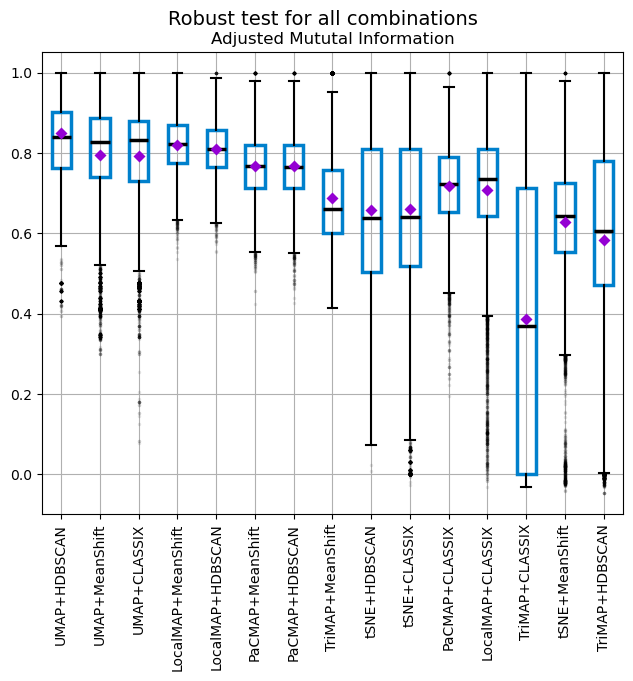

In [11]:
fig = plt.figure(figsize=(df_AMIBoxPlot.shape[1]*0.5,6))
ax = fig.add_subplot()

title = 'Adjusted Mututal Information'
(df_AMIBoxPlot
    .loc[:, df_AMIwgtav.index]
    .plot
    .box(title=title,
         ax=ax,
         **box_args
        )
)
fig.suptitle('Robust test for all combinations',
             x=0.5,
             y=0.95,
             fontsize=14,
            )
plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0.05,
                    hspace=None,
                   )

## Plots showing results in detail

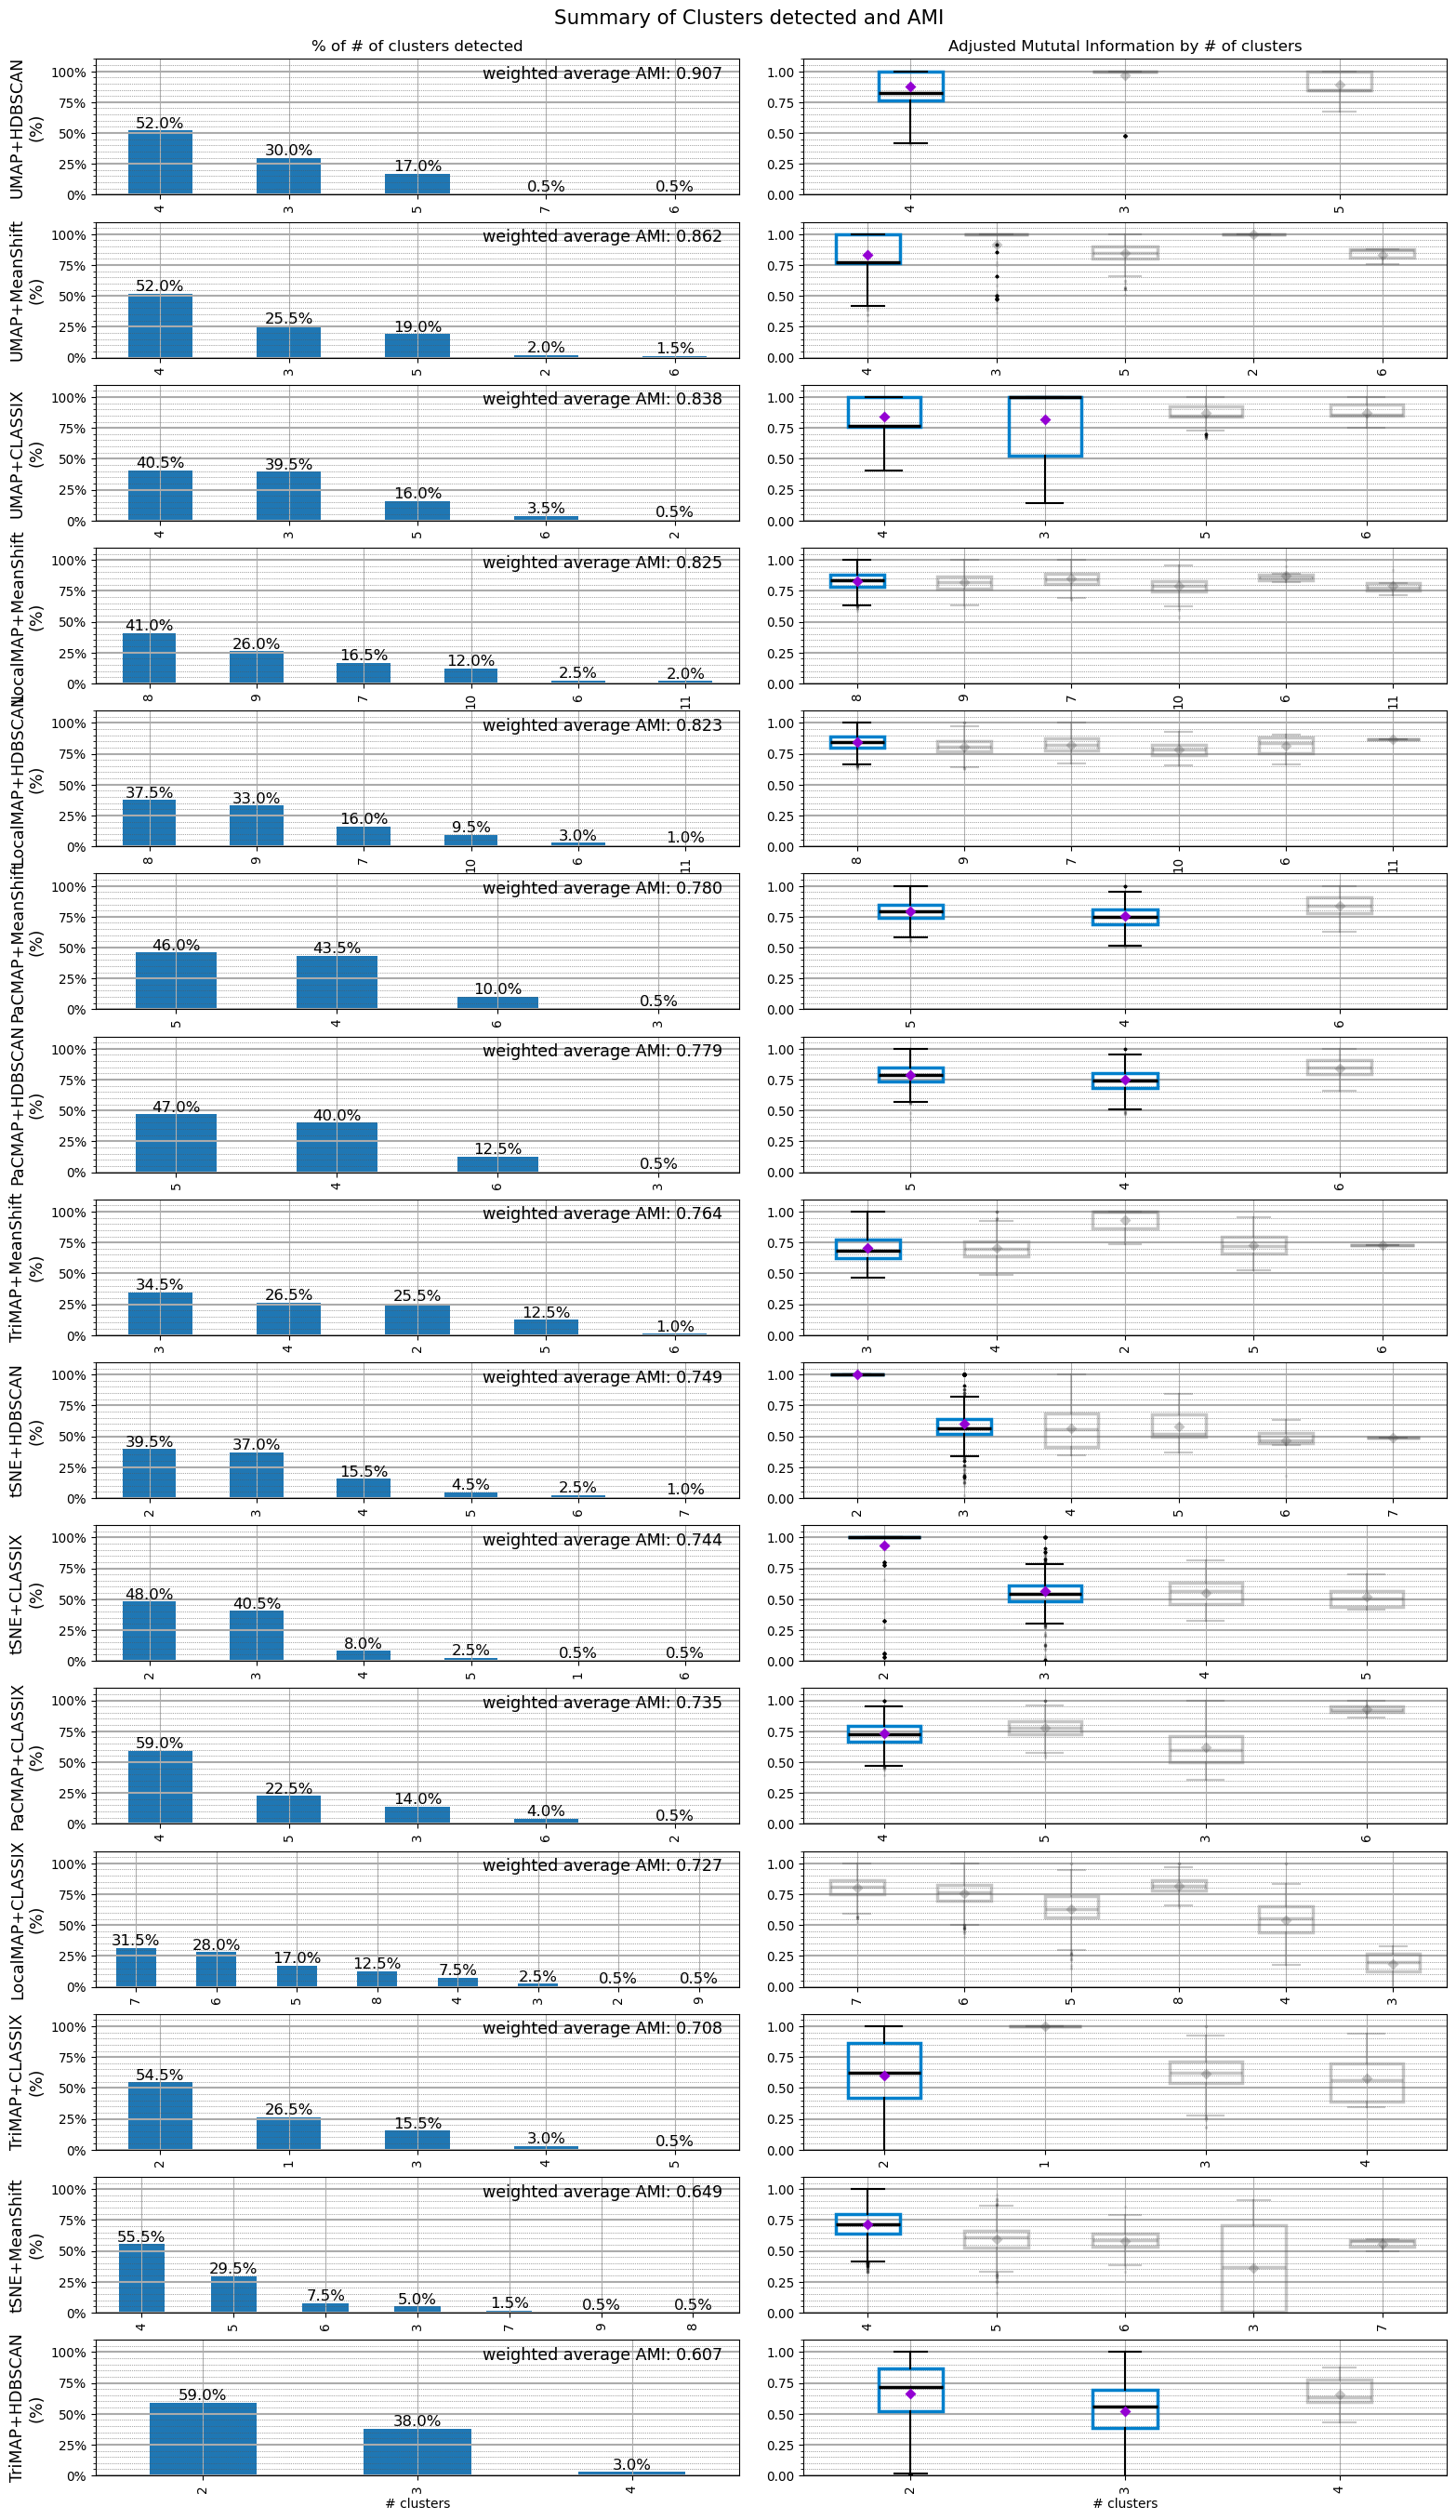

In [12]:
fs = 14
combinations = SelectionData.keys()
len_combs = len(combinations)
fig, axes = plt.subplots(ncols=2,
                         nrows=len_combs,
                         figsize=(len_combs*1.25,
                                  len_combs*2.25,
                                 ),
                        )
for i_ax, (combination, av) in enumerate(df_AMIwgtav.iterrows()):
    results = SelectionData[combination]
    df_plot, CluMet_dict_clust = results.values()
    ax0, ax1 = axes[i_ax]
    ax0.margins(0.125)
    ### Percentage bars plotting
    bars = df_plot['pct'].plot.bar(legend=False,
                                   grid=True,
                                   title=('% of # of clusters detected'
                                          if i_ax==0
                                          else
                                          ''
                                         ),
                                   ylim=(0.0, 110.0),
                                   fontsize=fs*0.7,
                                   ax=ax0,
                                  )
    ax0.set_ylabel(f'{combination}\n(%)',
                   fontsize=fs*0.9,
                  )
    ### Customisation of percentage bars
    labels = [f'{pct:.1f}%' for pct in df_plot['pct']]
    for container in ax0.containers:
        ### Percentage label text
        (bars
         .bar_label(container,
                    labels=labels,
                    fontsize=fs*0.85,
                   )
        )
        ### y-axis format
        (bars
         .yaxis
         .set_major_formatter(PercentFormatter()
                             )
        )
    ### AMI Boxplotting
    cols = [int(t._text)
            for t
            in bars.get_xticklabels()
           ]
    cols_less33pct = (df_plot
                      .query('pct<33.333')
                      .index
                      .astype(str)
                     )
    ax0.text(x=0.975,
             y=0.95,
             s=f'weighted average AMI: {av.values[0]:.3f}',
             va='top',
             ha='right',
             fontsize=fs*0.9,
             transform=ax0.transAxes,
            )
    ax0.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
    ax0.grid(visible=True,
             axis='y',
             which='minor',
             color=[0.33]*3,
             linestyle=':',
             linewidth=0.5,
            )
    ax0.grid(visible=True,
             axis='y',
             which='major',
             color=[0.67]*3,
             linestyle='-',
             linewidth=1.5,
            )
    title = 'Adjusted Mututal Information by # of clusters'
    df = pd.DataFrame(dict([(k,
                             pd.Series(v[0],)
                            )
                            for k,v
                            in CluMet_dict_clust.items()
                           ]
                          )
                     )
    bp = (df
          [cols]
          .plot
          .box(title=title if i_ax==0 else '',
               ylim=(0.0,1.1),
               ax=ax1,
               fontsize=fs*0.7,
               **box_args,
              )
         )
    (whiskers,
     caps,
    ) = [itertools.batched(bp.lines[k], 2)
         for k
         in ['whiskers',
             'caps',
            ]
        ]
    box_labels = bp.ax.get_xmajorticklabels()
    for i, (label,
            box,
            median,
            mean,
            whisker,
            cap,
           ) in enumerate(zip(box_labels,
                              *[bp.lines[k]
                                for k
                                in ['boxes',
                                    'medians',
                                    'means',
                                   ]
                               ],
                              whiskers,
                              caps,
                             )
                         ):
        dim_colour = [0.33]*4
        if label._text in cols_less33pct:
            box.set_edgecolor(dim_colour)
            median.set_color(dim_colour)
            mean.set_markerfacecolor(dim_colour)
            for w, c in zip(whisker, cap):
                w.set_color(dim_colour)
                c.set_color(dim_colour)
    ### Boxplot grid customisation
    ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
    ax1.grid(visible=True,
             axis='y',
             which='minor',
             color=[0.33]*3,
             linestyle=':',
             linewidth=0.5,
            )
    ax1.grid(visible=True,
             axis='y',
             which='major',
             color=[0.67]*3,
             linestyle='-',
             linewidth=1.5,
            )
    ### Setting y-axis labels
    if i_ax == len(axes)-1:
        ax0.set_xlabel('# clusters')
        ax1.set_xlabel('# clusters')
### Figure-wide customisations
fig.suptitle('Summary of Clusters detected and AMI',
             x=0.5,
             y=0.89,
             ha='center',
             va='bottom',
             fontsize=fs*1.1,
             transform=fig.transFigure,
            )
plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0.1,
                    hspace=None,
                   )

# Saving Data labeled by Clusters

In [14]:
combination=list(combinations)[0]

df_clusters = embeddings_clusterings[combination]
clustering_i = (df_clusters
                .iloc[:, 1:]
                .columns
               )

clusts_combinations = list(itertools
                           .combinations(clustering_i,
                                         2,
                                        )
                          )
df_metrics = (pd
              .DataFrame(data=np
                         .array(CluMet_dict
                                [combination]
                               )
                         .T
                         ,
                         columns=['AMI'],
                        )
             )

df_metrics = (df_metrics
              .join(pd
                    .DataFrame(data=clusts_combinations,
                               columns=['c0','c1'],
                              ),
                   )
             )
dict_clust_n = {}
for c in df_clusters[1:]:
    df = df_clusters[c]
    n = len(set(df.values))
    dict_clust_n[c] = n

for c in df_metrics.columns[-2:]:
    df_metrics.insert(loc=len(df_metrics
                              .columns
                             ),
                      column = f'{c}_n',
                      value=(df_metrics
                             [c]
                             .map(dict_clust_n)
                            ),
                     )

df_metrics.sort_values(by='AMI',
                       ascending=False,
                      ).head()

best_clusterings = pd.value_counts(df_metrics
                                   .round(2)
                                   .query('AMI==1.0')
                                   [['c0', 'c1']]
                                   .values
                                   .flatten()
                                  )

df_clusters = embeddings_clusterings[combination]

dict_cluster = (df_clusters
                 .groupby([best_clusterings.index[0],
                           'participant_id',
                          ]
                         )
                 .size()
                 .unstack()
                 .to_dict(orient='index')
                )
dict_cluster2participant = {k:[v0
                               for v0,v1
                               in v.items() if np.isfinite(v1)
                              ]
                            for k,v
                            in dict_cluster.items()
                           }
dict_participant2cluster = {int(v1):k
                            for k,v0
                            in dict_cluster2participant.items()
                            for v1
                            in v0
                           }

4

{0: [10186, 10217, 40703, 60109, 60203, 1172957, 30007371, 70003741],
 1: [10170, 13239, 40103, 40202, 1625065, 70003283],
 2: [10142,
  10154,
  10165,
  10185,
  13258,
  40201,
  40402,
  80307,
  80402,
  80601,
  191064,
  302366,
  2000805,
  2006497,
  14036388,
  14048013,
  51004784],
 3: [10146,
  10180,
  10252,
  10301,
  10501,
  10701,
  13141,
  40105,
  40701,
  40702,
  40704,
  60104,
  60201,
  60202,
  60210,
  60801,
  80606,
  80803,
  81103,
  14040834,
  21004488,
  70003161,
  70004464]}

{10186: 0,
 10217: 0,
 40703: 0,
 60109: 0,
 60203: 0,
 1172957: 0,
 30007371: 0,
 70003741: 0,
 10170: 1,
 13239: 1,
 40103: 1,
 40202: 1,
 1625065: 1,
 70003283: 1,
 10142: 2,
 10154: 2,
 10165: 2,
 10185: 2,
 13258: 2,
 40201: 2,
 40402: 2,
 80307: 2,
 80402: 2,
 80601: 2,
 191064: 2,
 302366: 2,
 2000805: 2,
 2006497: 2,
 14036388: 2,
 14048013: 2,
 51004784: 2,
 10146: 3,
 10180: 3,
 10252: 3,
 10301: 3,
 10501: 3,
 10701: 3,
 13141: 3,
 40105: 3,
 40701: 3,
 40702: 3,
 40704: 3,
 60104: 3,
 60201: 3,
 60202: 3,
 60210: 3,
 60801: 3,
 80606: 3,
 80803: 3,
 81103: 3,
 14040834: 3,
 21004488: 3,
 70003161: 3,
 70004464: 3}

In [15]:
pd.__version__

'2.2.1'

In [19]:
# display(out_folder)
data_folder = r'.'
# in_file = 'BRC_constructs+imputeddata_limited.csv'
in_file = 'Data.csv'
# in_file = 'Originals+Synthetics_B.csv'

plus_misseddata = pd.read_csv(join(data_folder,
                                   in_file,
                                  ),
                             )

plus_misseddata.insert(loc=4,
                       column='cluster',
                       value=(plus_misseddata
                               ['participant_id']
                               .map(dict_participant2cluster)
                              ),
                      )
display(in_folder, plus_misseddata.shape, plus_misseddata.head())

out_folder = in_folder #r'.\Results\AllConstructs\mlVAR\Data'
plus_misseddata.to_csv(join(out_folder,
                            'BRC_data+clusters.csv',
                            ),
                       index=False,
                      )

'.'

(4467, 12)

,dataset,participant_id,encounter_date,day_n,cluster,hopelessness,depression,voices,visions,anxiety,paranoia,delusions
0,clintouch,10142,2018-08-09,1,2,4.5,2.25,1.5,1.0,2.25,1.75,1.0
1,clintouch,10142,2018-08-10,2,2,7.0,2.00,1.0,1.0,3.00,2.25,1.0
2,clintouch,10142,2018-08-11,3,2,7.0,3.00,1.0,1.0,2.00,5.50,1.0
3,clintouch,10142,2018-08-12,4,2,7.0,2.00,1.0,1.0,1.00,1.75,1.5
4,clintouch,10142,2018-08-13,5,2,7.0,2.00,1.0,1.0,1.00,1.50,1.5
